In [3]:
import os
from cltk.tokenize.word import WordTokenizer
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score

In [6]:
def process_text(text):
    word_tokenizer = WordTokenizer('latin')
    words = word_tokenizer.tokenize(text.lower())
    word_count = Counter(words)
    total_words = len(words)
    relative_frequencies = {word: count / total_words for word, count in word_count.items()}
    return relative_frequencies

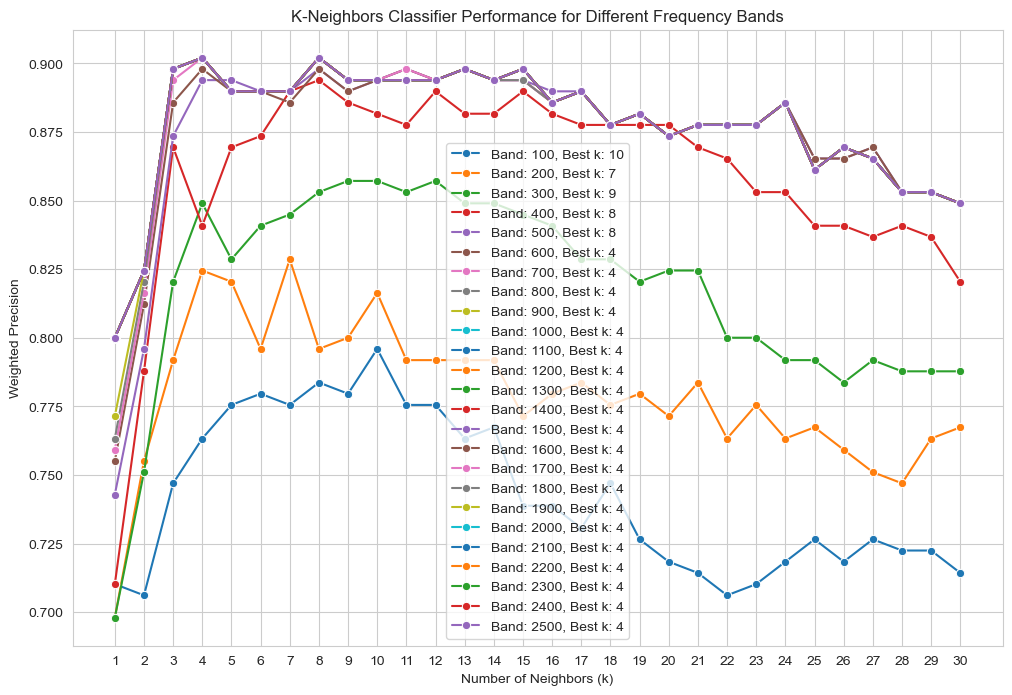

CPU times: user 48min 8s, sys: 3min 7s, total: 51min 15s
Wall time: 18min 36s


In [72]:
%%time

# Define the range of frequency bands
frequency_bands = range(100, 2501, 100)  # Start from 100 and increment by 100 until 2500

best_results = []

for band in frequency_bands:
    data = []
    labels = []

    for filename in os.listdir('../../corpora/corpus_chunks/'):
        if filename.endswith('.txt') and 'oct' not in filename and 'her_o' not in filename:
            label = filename.split('_')[0]
            labels.append(label)
            with open(os.path.join('../../corpora/corpus_chunks/', filename), 'r', encoding='utf-8') as file:
                text = file.read()
                relative_frequencies = process_text(text)
                top_words = sorted(relative_frequencies, key=relative_frequencies.get, reverse=True)[:band]
                data.append({word: relative_frequencies.get(word, 0) for word in top_words})

    # Convert data to a 2D array-like format
    feature_names = set(word for freq_dict in data for word in freq_dict.keys())
    X = np.array([[freq_dict.get(word, 0) for word in feature_names] for freq_dict in data])

    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    k_values = range(1, 31)  # Example: Test k from 1 to 30
    results = []

    for k in k_values:
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)
        predictions = knn_classifier.predict(X_test)
        recall = recall_score(y_test, predictions, average='weighted')  # Using weighted precision for class imbalance
        results.append(precision)

    best_index = np.argmax(results)
    best_k = k_values[best_index]
    best_recall = results[best_index]
    
    best_results.append((band, best_k, best_recall, results))

# Plot using seaborn
plt.figure(figsize=(12, 8))
for band, best_k, best_precision, results in best_results:
    sns.lineplot(x=k_values, y=results, marker='o', label=f'Band: {band}, Best k: {best_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Weighted Precision')
plt.title('K-Neighbors Classifier Performance for Different Frequency Bands')
plt.xticks(k_values)
plt.legend()
plt.show()

In [9]:
data = []
labels = []

for filename in os.listdir('../../corpora/corpus_chunks/'):
    if filename.endswith('.txt') and 'oct' not in filename and 'her_o' not in filename:
        label = filename.split('_')[0]
        labels.append(label)
        with open(os.path.join('../../corpora/corpus_chunks/', filename), 'r', encoding='utf-8') as file:
            text = file.read()
            relative_frequencies = process_text(text)
            top_words = sorted(relative_frequencies, key=relative_frequencies.get, reverse=True)[:500]
            data.append({word: relative_frequencies.get(word, 0) for word in top_words})

# Convert data to a 2D array-like format
feature_names = set(word for freq_dict in data for word in freq_dict.keys())
X = np.array([[freq_dict.get(word, 0) for word in feature_names] for freq_dict in data])

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

k = 8  # using the optimal number of neighbours to predict
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

predictions = knn_classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         luc       0.93      0.87      0.90        15
       manil       1.00      0.89      0.94         9
        ovid       0.92      1.00      0.96        95
     persius       0.33      0.33      0.33         3
       phaed       1.00      1.00      1.00         6
         sen       0.94      0.68      0.79        25
      silius       1.00      0.95      0.97        40
        stat       0.77      0.89      0.83        38
     valflac       0.73      0.57      0.64        14

    accuracy                           0.90       245
   macro avg       0.85      0.80      0.82       245
weighted avg       0.90      0.90      0.90       245



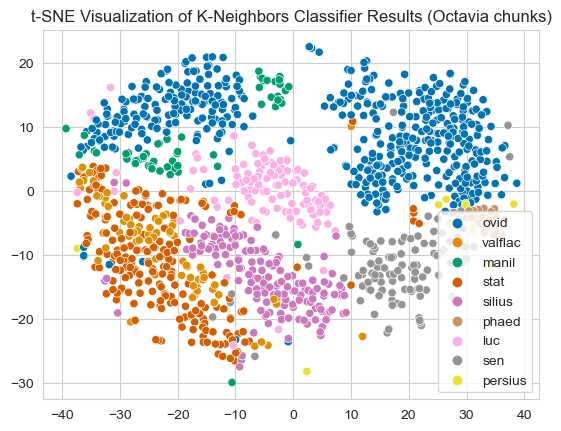

Classification Report for Octavia chunks:
               precision    recall  f1-score   support

         luc       0.00      0.00      0.00         0
        ovid       0.00      0.00      0.00         0
         sen       1.00      0.64      0.78        11
      silius       0.00      0.00      0.00         0

    accuracy                           0.64        11
   macro avg       0.25      0.16      0.19        11
weighted avg       1.00      0.64      0.78        11



/Users/paschalis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/paschalis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/paschalis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.manifold import TSNE

# Test the model on the disputed texts "oct" and "her_o"
disputed_texts = ["oct"]  # "her_o"
disputed_data = []
disputed_labels = []

for filename in os.listdir('../../corpora/corpus_chunks/'):
    for disputed_text in disputed_texts:
        if filename.endswith('.txt') and disputed_text in filename and "her_o" not in filename:
            label = filename.split('_')[0]
            disputed_labels.append(label)
            with open(os.path.join('../../corpora/corpus_chunks/', filename), 'r', encoding='utf-8') as file:
                text = file.read()
                relative_frequencies = process_text(text)
                # Keep only the top 1000 most frequent words
                top_1000_words = sorted(relative_frequencies, key=relative_frequencies.get, reverse=True)[:1000]
                disputed_data.append({word: relative_frequencies.get(word, 0) for word in top_1000_words})

# Convert disputed data to a 2D array-like format
disputed_X = np.array([[freq_dict.get(word, 0) for word in feature_names] for freq_dict in disputed_data])

# Test the classifier on disputed texts
disputed_predictions = knn_classifier.predict(disputed_X)

# Combine all data and labels
all_X = np.vstack((X_train, X_test, disputed_X))
all_labels = y_train + y_test + disputed_labels

# Generate a palette for different classes
palette = sns.color_palette("colorblind", n_colors=len(set(all_labels)))

# Visualize the results using t-SNE
X_embedded = TSNE(n_components=2).fit_transform(all_X)
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=all_labels, palette=palette)
plt.title('t-SNE Visualization of K-Neighbors Classifier Results (Octavia chunks)')
plt.show()

# Print classification report for disputed texts
disputed_report = classification_report(disputed_labels, disputed_predictions)
print("Classification Report for Octavia chunks:\n", disputed_report)

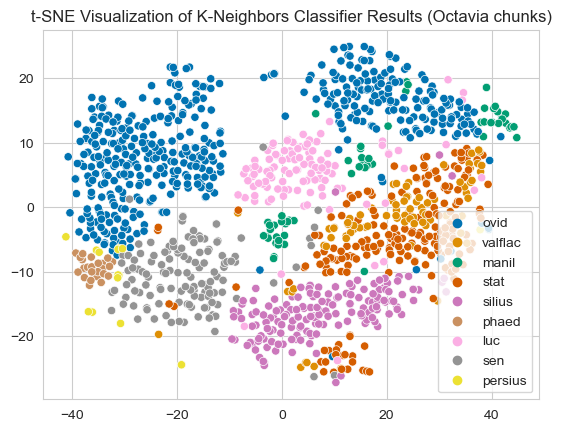

Classification Report for Octavia chunks:
               precision    recall  f1-score   support

         luc       0.00      0.00      0.00         0
        ovid       0.00      0.00      0.00         0
     persius       0.00      0.00      0.00         0
         sen       1.00      0.33      0.50        24

    accuracy                           0.33        24
   macro avg       0.25      0.08      0.12        24
weighted avg       1.00      0.33      0.50        24



/Users/paschalis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/paschalis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/paschalis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.manifold import TSNE

# test the model on the disputed texts "her_o"
disputed_texts = ["her_o"]
disputed_data = []
disputed_labels = []

for filename in os.listdir('../../corpora/corpus_chunks/'):
    for disputed_text in disputed_texts:
        if filename.endswith('.txt') and disputed_text in filename and "oct" not in filename:
            label = filename.split('_')[0]
            disputed_labels.append(label)
            with open(os.path.join('../../corpora/corpus_chunks/', filename), 'r', encoding='utf-8') as file:
                text = file.read()
                relative_frequencies = process_text(text)
                # Keep only the top 1000 most frequent words
                top_1000_words = sorted(relative_frequencies, key=relative_frequencies.get, reverse=True)[:1000]
                disputed_data.append({word: relative_frequencies.get(word, 0) for word in top_1000_words})

# convert disputed data to a 2D array-like format
disputed_X = np.array([[freq_dict.get(word, 0) for word in feature_names] for freq_dict in disputed_data])

# test the classifier on disputed texts
disputed_predictions = knn_classifier.predict(disputed_X)

# combine all data and labels
all_X = np.vstack((X_train, X_test, disputed_X))
all_labels = y_train + y_test + disputed_labels

# generate a palette for different classes
palette = sns.color_palette("colorblind", n_colors=len(set(all_labels)))

# visualize the results using t-SNE
X_embedded = TSNE(n_components=2).fit_transform(all_X)
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=all_labels, palette=palette)
plt.title('t-SNE Visualization of K-Neighbors Classifier Results (Octavia chunks)')
plt.show()

# print classification report for disputed texts
disputed_report = classification_report(disputed_labels, disputed_predictions)
print("Classification Report for Octavia chunks:\n", disputed_report)